In [61]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
#loading the dataset
df = pd.read_excel("./data/employment.xlsx")

data = df[(df['time_period'] >= 2012) & (df['time_period'] <= 2022)]
data.head()

,time_period,time_identifier,geographic_level,country_code,country_name,age_group,graduate_type,Employment_rate,High_skill_emp_rate,Unemployment_rate,inactivity_rate,med_low_skill
30,2012,Calendar year,National,E92000001,England,Age Group 16-64,Graduate,85.6,65.4,4.3,10.6,20.2
31,2012,Calendar year,National,E92000001,England,Age Group 16-64,Non-Graduate,67.1,20.0,9.5,25.8,47.1
32,2012,Calendar year,National,E92000001,England,Age Group 16-64,Postgraduate,86.3,78.0,3.9,10.3,8.3
33,2012,Calendar year,National,E92000001,England,Age Group 21-30,Graduate,84.6,53.9,7.1,8.9,30.7
34,2012,Calendar year,National,E92000001,England,Age Group 21-30,Non-Graduate,67.7,15.4,13.1,22.1,52.3


In [63]:
# checking the dataset shape(number of rows and column)
data.shape

(66, 12)

In [64]:
data.describe()

,time_period,Employment_rate,High_skill_emp_rate,Unemployment_rate,inactivity_rate,med_low_skill
count,66.00000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,2017.00000,81.939394,52.304545,5.003030,13.859091,29.634848
std,3.18651,7.852425,24.137793,2.432597,6.798687,16.867141
min,2012.00000,67.100000,14.800000,1.900000,6.600000,8.300000
25%,2014.00000,74.150000,21.950000,3.225000,8.900000,14.425000
50%,2017.00000,86.600000,63.000000,4.500000,10.150000,24.800000
75%,2020.00000,87.500000,72.800000,6.275000,20.375000,48.300000
max,2022.00000,90.600000,78.700000,13.100000,26.900000,57.800000


# Data Cleaning

In [65]:
# Checking for null Value in the data
data.isnull().sum()

time_period            0
time_identifier        0
geographic_level       0
country_code           0
country_name           0
age_group              0
graduate_type          0
Employment_rate        0
High_skill_emp_rate    0
Unemployment_rate      0
inactivity_rate        0
med_low_skill          0
dtype: int64

In [66]:
# Removing unwanted Columns from the data
data_column_remove = data.drop(columns=["country_code", "time_identifier", "geographic_level", "country_name"], inplace = True)

/tmp/ipykernel_15771/2243590601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_column_remove = data.drop(columns=["country_code", "time_identifier", "geographic_level", "country_name"], inplace = True)


In [67]:
data.head()

,time_period,age_group,graduate_type,Employment_rate,High_skill_emp_rate,Unemployment_rate,inactivity_rate,med_low_skill
30,2012,Age Group 16-64,Graduate,85.6,65.4,4.3,10.6,20.2
31,2012,Age Group 16-64,Non-Graduate,67.1,20.0,9.5,25.8,47.1
32,2012,Age Group 16-64,Postgraduate,86.3,78.0,3.9,10.3,8.3
33,2012,Age Group 21-30,Graduate,84.6,53.9,7.1,8.9,30.7
34,2012,Age Group 21-30,Non-Graduate,67.7,15.4,13.1,22.1,52.3


In [68]:
# Cleaning the Age Group Values
data['age_group'] = data['age_group'].str.extract(r'(\d+-\d+)')

/tmp/ipykernel_15771/4259746780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_group'] = data['age_group'].str.extract(r'(\d+-\d+)')


In [69]:
data.head()

,time_period,age_group,graduate_type,Employment_rate,High_skill_emp_rate,Unemployment_rate,inactivity_rate,med_low_skill
30,2012,16-64,Graduate,85.6,65.4,4.3,10.6,20.2
31,2012,16-64,Non-Graduate,67.1,20.0,9.5,25.8,47.1
32,2012,16-64,Postgraduate,86.3,78.0,3.9,10.3,8.3
33,2012,21-30,Graduate,84.6,53.9,7.1,8.9,30.7
34,2012,21-30,Non-Graduate,67.7,15.4,13.1,22.1,52.3


In [70]:
# Moving Employment_rate column to the last column
new_column_order = [col for col in data.columns if col != 'Employment_rate'] + ['Employment_rate']
data = data.reindex(columns=new_column_order)
data.head()

,time_period,age_group,graduate_type,High_skill_emp_rate,Unemployment_rate,inactivity_rate,med_low_skill,Employment_rate
30,2012,16-64,Graduate,65.4,4.3,10.6,20.2,85.6
31,2012,16-64,Non-Graduate,20.0,9.5,25.8,47.1,67.1
32,2012,16-64,Postgraduate,78.0,3.9,10.3,8.3,86.3
33,2012,21-30,Graduate,53.9,7.1,8.9,30.7,84.6
34,2012,21-30,Non-Graduate,15.4,13.1,22.1,52.3,67.7


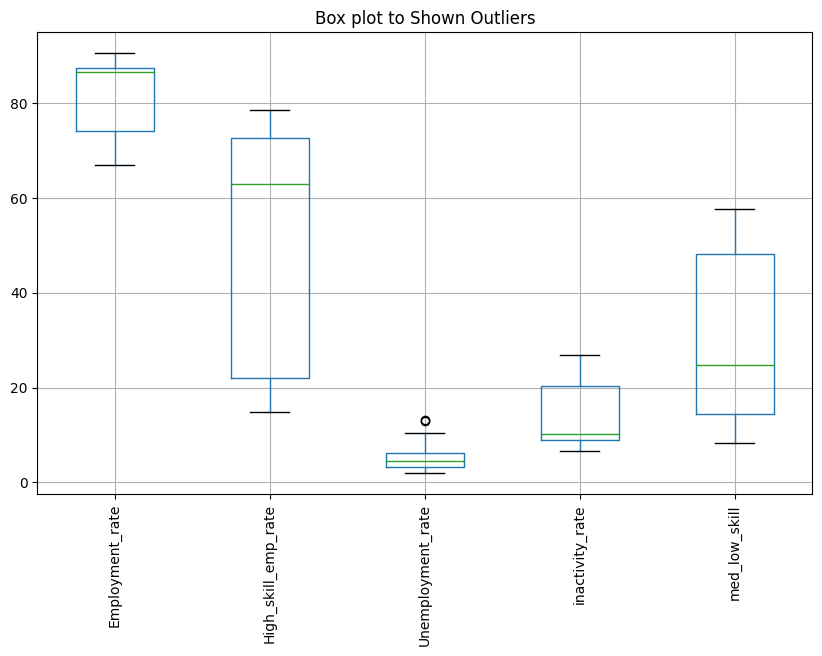

In [71]:
plt.figure(figsize=(10, 6))  
data.boxplot(column=['Employment_rate','High_skill_emp_rate','Unemployment_rate','inactivity_rate','med_low_skill'])
plt.xticks(rotation=90)  
plt.title('Box plot to Shown Outliers')
plt.show()

In [72]:
acceptable_range = data.describe()
acceptable_range

,time_period,High_skill_emp_rate,Unemployment_rate,inactivity_rate,med_low_skill,Employment_rate
count,66.00000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,2017.00000,52.304545,5.003030,13.859091,29.634848,81.939394
std,3.18651,24.137793,2.432597,6.798687,16.867141,7.852425
min,2012.00000,14.800000,1.900000,6.600000,8.300000,67.100000
25%,2014.00000,21.950000,3.225000,8.900000,14.425000,74.150000
50%,2017.00000,63.000000,4.500000,10.150000,24.800000,86.600000
75%,2020.00000,72.800000,6.275000,20.375000,48.300000,87.500000
max,2022.00000,78.700000,13.100000,26.900000,57.800000,90.600000


In [73]:
# Handling the Outliers

columns_to_handle_outliers = ['Employment_rate', 'High_skill_emp_rate', 'Unemployment_rate', 'inactivity_rate', 'med_low_skill']

# Iterate over each column
for column in columns_to_handle_outliers:
    # Calculate quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Replace outliers with NaN (if you want to remove outliers, use drop instead of replace)
    data[column].loc[outliers.index] = np.nan

/tmp/ipykernel_15771/2911122274.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].loc[outliers.index] = np.nan
/tmp/ipykernel_15771/2911122274.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].loc[outliers.index] = np.nan
/tmp/ipykernel_15771/2911122274.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].loc[outliers.index] = np.nan
/tmp/ipykernel_15771/2911122274.py:22: SettingWithCopyWarn

In [74]:
data.isnull().sum()

time_period            0
age_group              0
graduate_type          0
High_skill_emp_rate    0
Unemployment_rate      2
inactivity_rate        0
med_low_skill          0
Employment_rate        0
dtype: int64

In [75]:
# Removing the outliers:
data.drop(outliers.index, inplace=True)

In [76]:
data

,time_period,age_group,graduate_type,High_skill_emp_rate,Unemployment_rate,inactivity_rate,med_low_skill,Employment_rate
30,2012,16-64,Graduate,65.4,4.3,10.6,20.2,85.6
31,2012,16-64,Non-Graduate,20.0,9.5,25.8,47.1,67.1
32,2012,16-64,Postgraduate,78.0,3.9,10.3,8.3,86.3
33,2012,21-30,Graduate,53.9,7.1,8.9,30.7,84.6
34,2012,21-30,Non-Graduate,15.4,NaN,22.1,52.3,67.7
...,...,...,...,...,...,...,...,...
91,2022,16-64,Non-Graduate,23.6,4.8,26.9,46.0,69.6
92,2022,16-64,Postgraduate,78.3,2.0,8.8,11.0,89.3
93,2022,21-30,Graduate,60.8,4.3,8.0,27.3,88.1
94,2022,21-30,Non-Graduate,21.9,5.7,21.1,52.5,74.4


In [77]:
# Checking for unique values in each column for inconsistencies

for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in time_period: [2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]
Unique values in age_group: ['16-64' '21-30']
Unique values in graduate_type: ['Graduate' 'Non-Graduate' 'Postgraduate']
Unique values in High_skill_emp_rate: [65.4 20.  78.  53.9 15.4 71.5 65.8 20.4 77.9 53.3 14.8 72.  67.7 20.2
 58.1 15.6 72.8 66.3 20.6 78.1 55.8 16.4 73.5 65.6 21.3 78.4 55.9 15.8
 75.4 65.5 21.4 77.8 57.9 17.2 73.9 22.1 76.4 57.1 18.3 71.6 65.7 23.1
 78.7 58.2 19.1 76.3 23.4 20.3 74.8 65.2 77.2 59.1 21.1 72.7 23.6 78.3
 60.8 21.9]
Unique values in Unemployment_rate: [ 4.3  9.5  3.9  7.1  nan  6.3  4.   9.3  3.5  6.5  5.6  3.3  7.6  2.3
  5.3 10.4  3.1  4.9  8.8  3.6  2.9  6.   2.1  4.6  7.8  2.8  5.4  2.4
  6.8  4.4  2.6  5.   2.2  6.9  4.8  1.9  3.7  5.5  2.7  6.2  3.2  5.7
  2.5  7.   2. ]
Unique values in inactivity_rate: [10.6 25.8 10.3  8.9 22.1 10.4 25.7 10.1 21.5  9.5 10.  25.6  8.2 21.4
  9.3 10.5 21.6 25.2  8.7 20.3  6.6 25.   7.5 19.6 24.8  8.5 20.4 10.2
 24.5  9.6  7.7 

In [78]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = ['Employment_rate', 'High_skill_emp_rate', 'Unemployment_rate', 'inactivity_rate', 'med_low_skill']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected columns
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])
data.head()

,time_period,age_group,graduate_type,High_skill_emp_rate,Unemployment_rate,inactivity_rate,med_low_skill,Employment_rate
30,2012,16-64,Graduate,0.546686,-0.227983,-0.483044,-0.563649,0.469748
31,2012,16-64,Non-Graduate,-1.348594,2.397368,1.769814,1.043389,-1.904266
32,2012,16-64,Postgraduate,1.072690,-0.429933,-0.527508,-1.274569,0.559575
33,2012,21-30,Graduate,0.066604,1.185668,-0.735008,0.063633,0.341422
34,2012,21-30,Non-Graduate,-1.540627,NaN,1.221421,1.354043,-1.827271


In [79]:
data.isnull().sum()

time_period            0
age_group              0
graduate_type          0
High_skill_emp_rate    0
Unemployment_rate      2
inactivity_rate        0
med_low_skill          0
Employment_rate        0
dtype: int64

In [80]:
data = data.dropna()
data.head()

,time_period,age_group,graduate_type,High_skill_emp_rate,Unemployment_rate,inactivity_rate,med_low_skill,Employment_rate
30,2012,16-64,Graduate,0.546686,-0.227983,-0.483044,-0.563649,0.469748
31,2012,16-64,Non-Graduate,-1.348594,2.397368,1.769814,1.043389,-1.904266
32,2012,16-64,Postgraduate,1.072690,-0.429933,-0.527508,-1.274569,0.559575
33,2012,21-30,Graduate,0.066604,1.185668,-0.735008,0.063633,0.341422
35,2012,21-30,Postgraduate,0.801339,0.781768,-0.735008,-0.940018,0.444082


In [81]:
# Encoding Categorical Variable using Label Encoder

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
data['age_group_encoded'] = label_encoder.fit_transform(data['age_group'])
data['graduate_type_encoded'] = label_encoder.fit_transform(data['graduate_type'])

data.head()

/tmp/ipykernel_15771/545253005.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_group_encoded'] = label_encoder.fit_transform(data['age_group'])
/tmp/ipykernel_15771/545253005.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['graduate_type_encoded'] = label_encoder.fit_transform(data['graduate_type'])


,time_period,age_group,graduate_type,High_skill_emp_rate,Unemployment_rate,inactivity_rate,med_low_skill,Employment_rate,age_group_encoded,graduate_type_encoded
30,2012,16-64,Graduate,0.546686,-0.227983,-0.483044,-0.563649,0.469748,0,0
31,2012,16-64,Non-Graduate,-1.348594,2.397368,1.769814,1.043389,-1.904266,0,1
32,2012,16-64,Postgraduate,1.072690,-0.429933,-0.527508,-1.274569,0.559575,0,2
33,2012,21-30,Graduate,0.066604,1.185668,-0.735008,0.063633,0.341422,1,0
35,2012,21-30,Postgraduate,0.801339,0.781768,-0.735008,-0.940018,0.444082,1,2


# Exploratory Data Analysis (EDA)

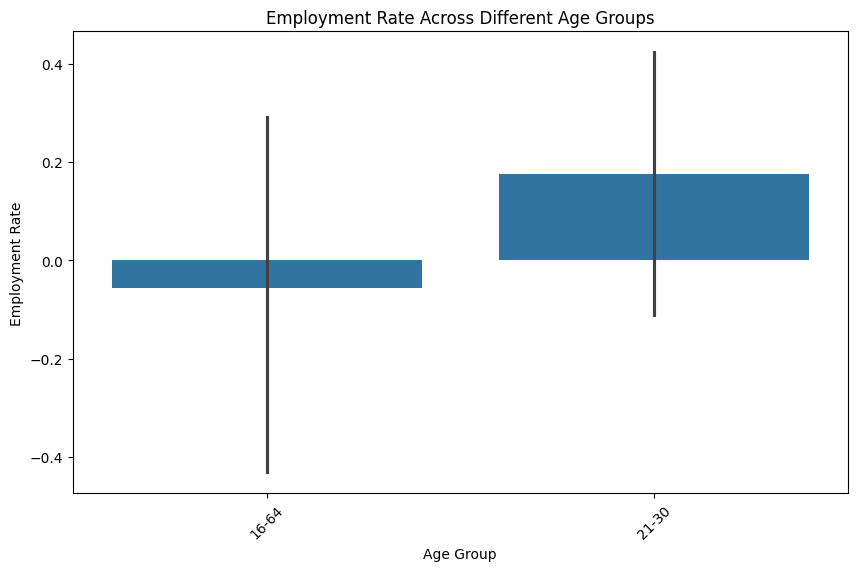

In [94]:
# Bar plot of Employment rate across different age groups
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='Employment_rate', data=data)
plt.title('Employment Rate Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Employment Rate')
plt.xticks(rotation=45)
plt.show()


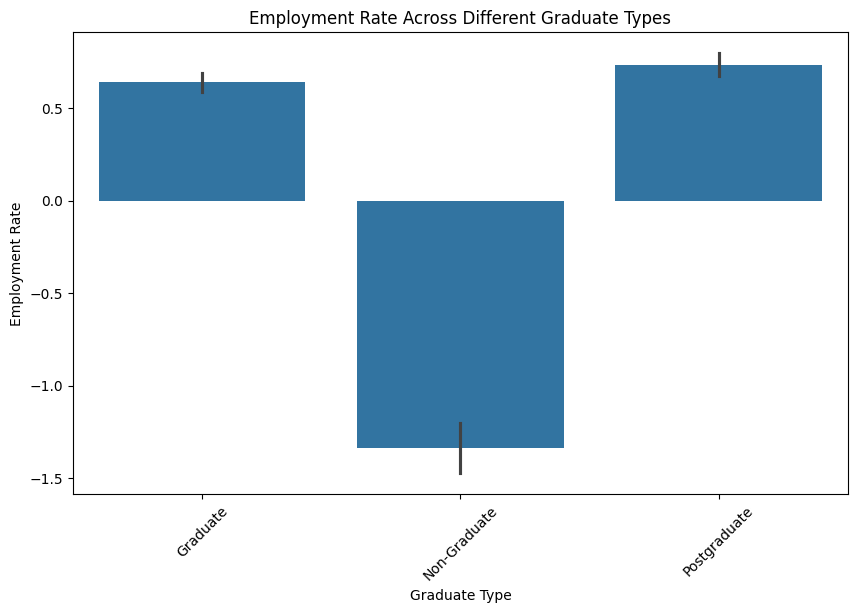

In [97]:
# Bar plot of Employment rate across different graduate types
plt.figure(figsize=(10, 6))
sns.barplot(x='graduate_type', y='Employment_rate', data=data)
plt.title('Employment Rate Across Different Graduate Types')
plt.xlabel('Graduate Type')
plt.ylabel('Employment Rate')
plt.xticks(rotation=45)
plt.show()

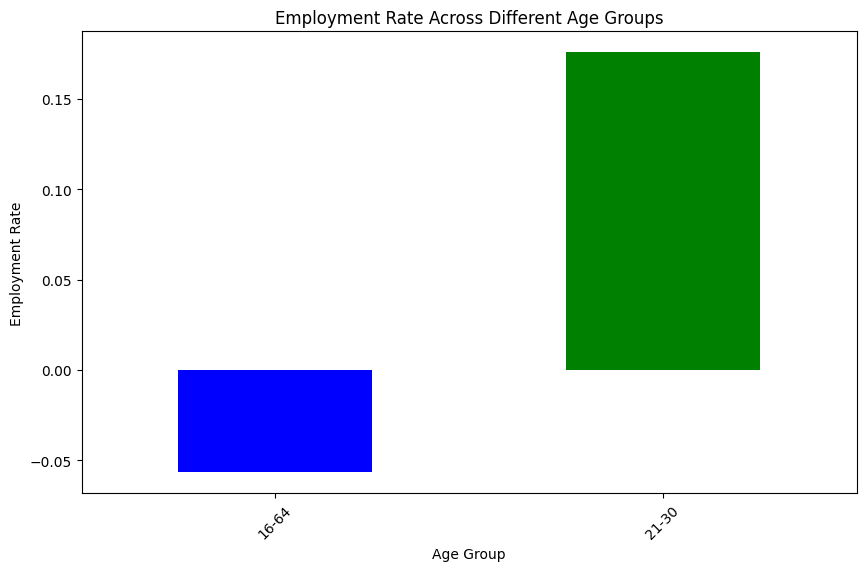

In [91]:
# Bar plot of Employment rate across different age groups with different colors for each age group
plt.figure(figsize=(10, 6))

# Define colors for each age group
colors = ['blue', 'green', 'red', 'orange', 'purple', 'pink', 'cyan']

# Plot the bar chart
data.groupby('age_group')['Employment_rate'].mean().plot(kind='bar', color=colors)

plt.title('Employment Rate Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Employment Rate')
plt.xticks(rotation=45)
plt.show()

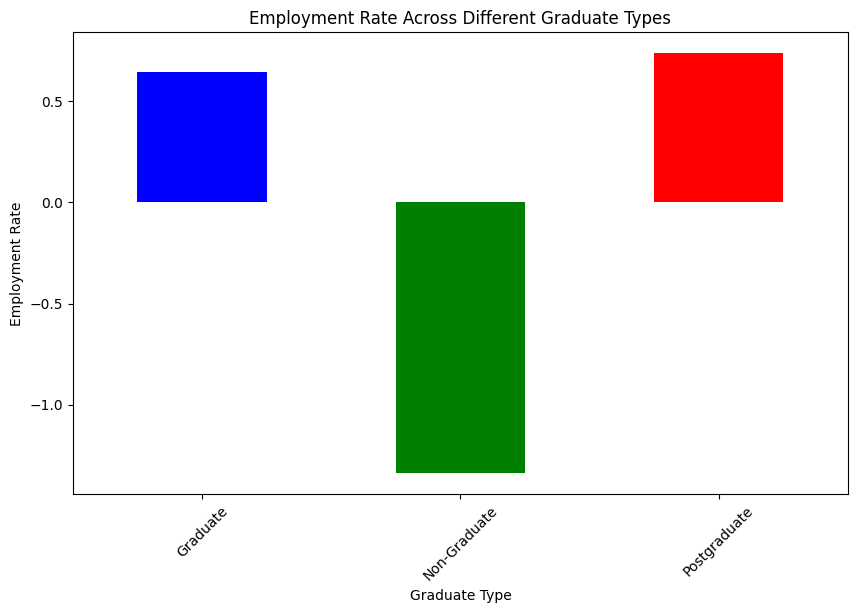

In [92]:
# Bar plot of Employment rate across different graduate types
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'orange', 'purple', 'pink', 'cyan']
data.groupby('graduate_type')['Employment_rate'].mean().plot(kind='bar', color=colors)
plt.title('Employment Rate Across Different Graduate Types')
plt.xlabel('Graduate Type')
plt.ylabel('Employment Rate')
plt.xticks(rotation=45)
plt.show()

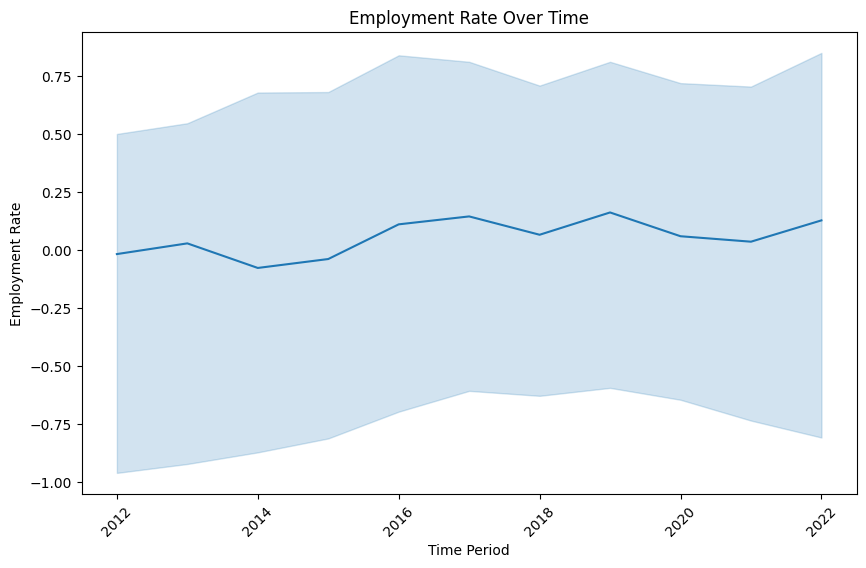

In [85]:
# Line plot of Employment rate over time (if applicable)
# Assuming you have a 'time_period' column in your DataFrame
plt.figure(figsize=(10, 6))
sns.lineplot(x='time_period', y='Employment_rate', data=data)
plt.title('Employment Rate Over Time')
plt.xlabel('Time Period')
plt.ylabel('Employment Rate')
plt.xticks(rotation=45)
plt.show()

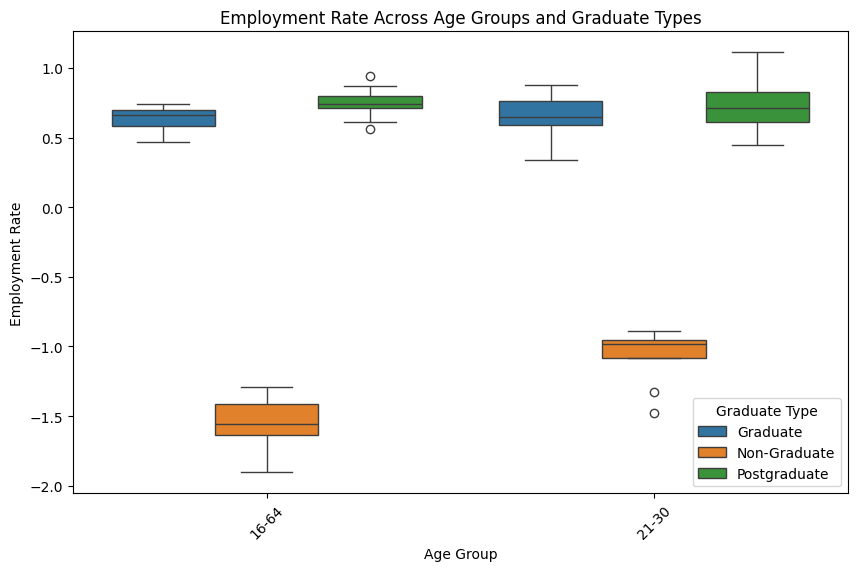

In [86]:
# Box plot of Employment rate across different age groups and graduate types
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='Employment_rate', hue='graduate_type', data=data)
plt.title('Employment Rate Across Age Groups and Graduate Types')
plt.xlabel('Age Group')
plt.ylabel('Employment Rate')
plt.xticks(rotation=45)
plt.legend(title='Graduate Type')
plt.show()

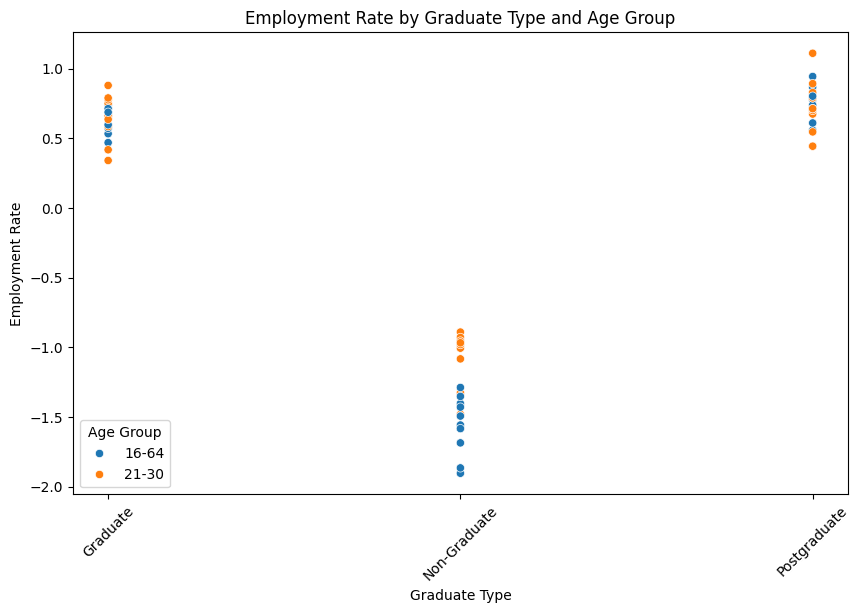

In [98]:
# Scatter plot of Employment rate vs Graduate Type, with different colors for each Age Group
plt.figure(figsize=(10, 6))
sns.scatterplot(x='graduate_type', y='Employment_rate', hue='age_group', data=data, palette='tab10')
plt.title('Employment Rate by Graduate Type and Age Group')
plt.xlabel('Graduate Type')
plt.ylabel('Employment Rate')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

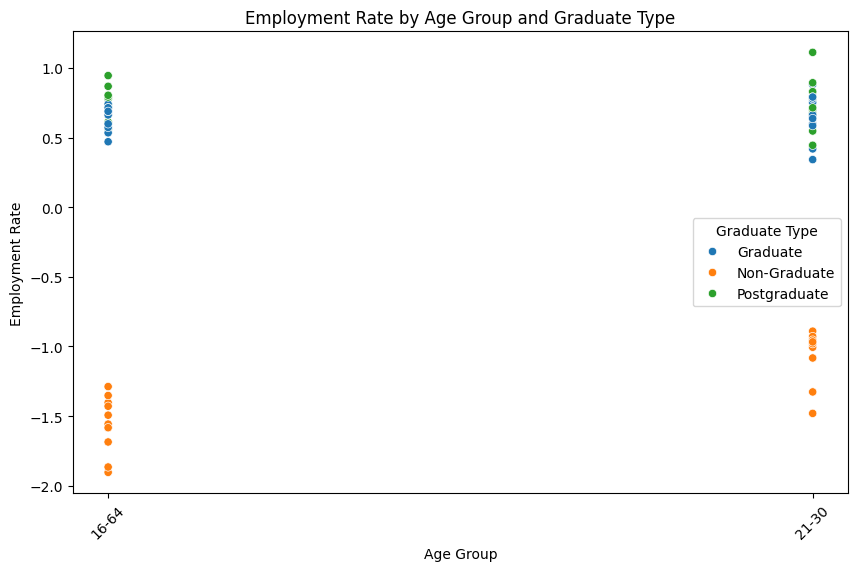

In [99]:
# Scatter plot of Employment rate vs Age Group, with different colors for each Graduate Type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_group', y='Employment_rate', hue='graduate_type', data=data, palette='tab10')
plt.title('Employment Rate by Age Group and Graduate Type')
plt.xlabel('Age Group')
plt.ylabel('Employment Rate')
plt.xticks(rotation=45)
plt.legend(title='Graduate Type')
plt.show()

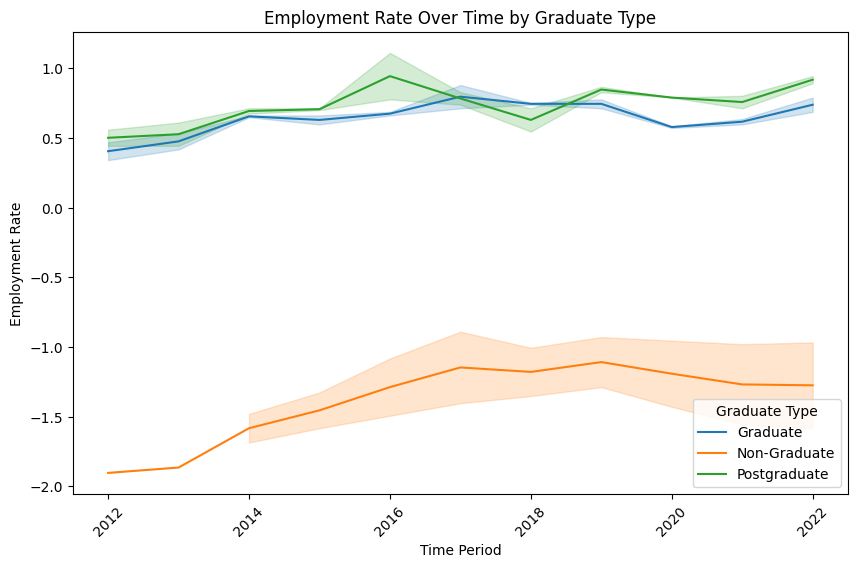

In [100]:
# Time series plot of Employment rate by Graduate Type
plt.figure(figsize=(10, 6))
sns.lineplot(x='time_period', y='Employment_rate', hue='graduate_type', data=data)
plt.title('Employment Rate Over Time by Graduate Type')
plt.xlabel('Time Period')
plt.ylabel('Employment Rate')
plt.xticks(rotation=45)
plt.legend(title='Graduate Type')
plt.show()

In [95]:
# Drop the original categorical columns after label encoding
data_witout_str = data.drop(['age_group', 'graduate_type'], axis=1)

# Correlation matrix
corr_matrix = data_witout_str.corr()
corr_matrix

,time_period,High_skill_emp_rate,Unemployment_rate,inactivity_rate,med_low_skill,Employment_rate,age_group_encoded,graduate_type_encoded
time_period,1.000000e+00,-0.031629,-0.267030,0.014110,0.065512,0.045237,4.670117e-02,-4.363731e-16
High_skill_emp_rate,-3.162946e-02,1.000000,-0.796951,-0.909160,-0.988896,0.945310,-7.523052e-02,2.507950e-01
Unemployment_rate,-2.670303e-01,-0.796951,1.000000,0.637519,0.784973,-0.760232,3.772876e-01,-1.503228e-01
inactivity_rate,1.411024e-02,-0.909160,0.637519,1.000000,0.841823,-0.985071,-2.474511e-01,-6.467595e-03
med_low_skill,6.551201e-02,-0.988896,0.784973,0.841823,1.000000,-0.886339,1.617776e-01,-3.375009e-01
Employment_rate,4.523667e-02,0.945310,-0.760232,-0.985071,-0.886339,1.000000,1.206709e-01,4.066452e-02
age_group_encoded,4.670117e-02,-0.075231,0.377288,-0.247451,0.161778,0.120671,1.000000e+00,4.186355e-18
graduate_type_encoded,-4.363731e-16,0.250795,-0.150323,-0.006468,-0.337501,0.040665,4.186355e-18,1.000000e+00


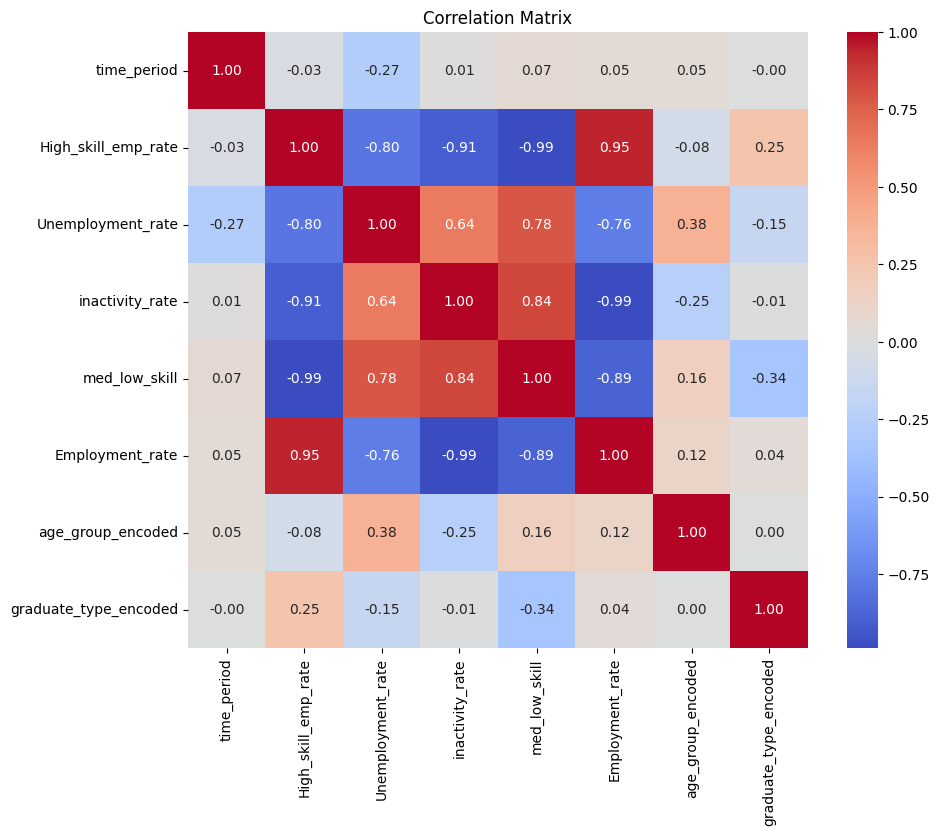

In [96]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [114]:
# ANOVA

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
model = ols('Employment_rate ~ C(age_group) + C(graduate_type)', data=data).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                     sum_sq    df           F        PR(>F)
C(age_group)       0.338610   1.0    8.430556  5.156404e-03
C(graduate_type)  56.122842   2.0  698.661294  2.740732e-42
Residual           2.409873  60.0         NaN           NaN


### Linear Regression

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the independent variables (features) and the dependent variable (target)
X = data[['age_group_encoded', 'graduate_type_encoded']]
y = data['Employment_rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict employment rate on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the coefficients of the linear regression model
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Mean Squared Error: 0.9673899710679473
Intercept: -0.5022465992758319
Coefficients: [0.51220813 0.19276063]


In [122]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

print("R-squared:", r_squared)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

R-squared: 0.945116284370605
Root Mean Squared Error (RMSE): 0.13632987691029871
Mean Absolute Error (MAE): 0.10579845389517815


### Decision Tree

In [120]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define the independent variables (features) and the dependent variable (target)
X = data[['age_group_encoded', 'graduate_type_encoded']]
y = data['Employment_rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the decision tree regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict employment rate on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0185858353383772
